# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 9 </span>

### Paolo Panatti (12606A)

### <font color="blue"> Esercizio 09.1

#### Obiettivo:
Risolvere il problema del commesso viaggiatore (TSP) utilizzando un algoritmo genetico (GA).

Il **problema del commesso viaggiatore** è un problema di ottimizzazione combinatoria in cui un commesso viaggiatore deve visitare $N$ città distribuite randomicamente su un piano, ciascuna una sola volta, partendo da una di esse (hometown) e ritornandoci alla fine del percorso. Lo scopo è quello di individuare il tragitto più breve, ossia di minimizzare la seguente funzione costo:
$$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$$
con $\vec{x}_{N+1}=\vec{x}_1$. È possibile utilizzare anche $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$, che corrisponde alla lunghezza effettiva del percorso. Ogni percorso $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$ è una particolare permutazione $P$ della sequenza ordinata delle città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$ ($\vec{c}_i$ è la posizione della città i-esima).

In questo esercizio, in particolare, ho scelto di rappresentare ciascun percorso tramite un vettore 1D i cui elementi sono numeri interi che indicano l'ordine con cui il commesso viaggiatore visita le varie città. Inoltre, per ridurre la degenerazione del miglior percorso a $2$ (stesso tragitto percorso in senso orario e antiorario), ho imposto il vincolo che la città di partenza sia sempre la prima, ossia che in posizione $0$ ci sia sempre la città numero $1$.

Per risolvere problemi di ottimizzazione, una delle possibili strategie è quella di utilizzare **algoritmi genetici**. Si tratta di algoritmi metaeuristici che prendono ispirazione dai processi evolutivi biologici, basati sul meccanismo della selezione naturale: tramite operatori genetici di selezione, crossover e mutazione, una popolazione di individui (insieme di possibili soluzioni del problema) viene fatta evolvere per un certo numero di generazioni, al fine di trovare la soluzione ottimale.

L'esercizio chiedeva di implementare un algoritmo genetico da applicare al problema del commesso viaggiatore per $N=34$ città disposte casualmente su una circonferenza e all'interno di un quadrato. Ho deciso di organizzare il mio codice in due classi: la classe ```Individuo```, che contiene i metodi relativi al singolo percorso, e la classe ```Popolazione```, che invece si occupa di evolvere l'intero insieme di percorsi.

#### Classe Individuo
Data membri privati:
```c++
Random* _point_rnd;     // puntatore ad un generatore di numeri casuali
int _ncities = 34;      // numero di città
Col<int> _path;         // vettore che rappresenta il percorso
double _length;         // lunghezza del percorso
double _pm = 0.2;       // probabilità di subire una mutazione
```
Metodi pubblici principali:
- metodi che permettono di accedere ai data membri privati o di modificarli.
- ```initialize()```: genera un percorso casuale compatibile con i vincoli applicando alla sequenza ordinata un numero di permutazioni casuali tra coppie di città pari al numero delle città e imposta la lunghezza del percorso tramite la funzione ```calc_length()```.
- ```checkbonds()```: verifica che i percorsi rispettino i vincoli del problema, ossia che in posizione $0$ ci sia la città numero $1$ e che ogni città venga visitata una volta soltanto. Questa funzione viene chiamata ogni volta che un nuovo percorso viene creato.
- ```calc_length()```: calcola la lunghezza del percorso (norma $L^{(2)}$) a partire da una matrice che contiene tutte le distanze al quadrato fra le città e aggiorna il data membro privato.
- operatori di mutazione:
  - ```swap()```: scambia di posto due città scelte casualmente.
  - ```shift()```: sposta $m$ città contigue $n$ posti in avanti (con condizioni periodiche al contorno).
  - ```swap_block()```: scambia di posto due blocchi di $m$ città contigue.
  - ```invert_block()```: inverte l'ordine di $m$ città contigue.
- ```mutate()```: sceglie casualmente una mutazione e la applica con probabilità $p_m = 0.2$.

#### Classe Popolazione
Data membri privati:
```c++
Random _rnd;                    // generatore di numeri casuali
mat _distanze;                  // matrice delle distanze
int _nindividuals;              // numero di individui
field <Individuo> _pop;         // popolazione
const double _selexp = 2.4;     // esponente per la selezione
const double _pcross = 0.8;     // probabilità di crossover
int _ngen;                      // numero di generazioni
```
Metodi pubblici principali:
- metodi per accedere ai data membri privati.
- ```initialize_pop()```: inizializza il generatore di numeri casuali, imposta il numero di individui, il numero di generazioni e la matrice delle distanze e crea la popolazione di partenza invocando la funzione ```initialize()``` della classe ```Individuo```.
- ```sort_by_length()```: riordina i percorsi della popolazione sulla base della loro lunghezza. Il percorso migliore viene posto all'inizio.
- ```select()```: seleziona un percorso per la "riproduzione" estraendo l'indice $j$ tramite l'algoritmo $j=int(M \times r^p)+1$, dove $M$ è il numero di individui, $r$ un numero casuale distribuito uniformemente nell'intervallo $\left[0,1\right)$ e $p$ un esponente opportuno. Per favorire i percorsi più brevi, ho scelto un esponente pari a $2.4$.
- ```crossover()```: genera due percorsi "figlio" a partire da due percorsi "genitore". Questi vengono tagliati in corrispondenza di un punto casuale, la prima parte viene conservata mentre il resto viene completato aggiungendo le città mancanti nell'ordine in cui compaiono nel "partner". Ciò accade con probabilità $p_c=0.8$.
- ```evolve()```: evolve la popolazione ripetendo i seguenti passaggi ```_ngen``` volte:
  1. Ordina la popolazione tramite la funzione ```sort_by_length()```
  2. Seleziona coppie di "genitori" con ```select()``` e applica il metodo ```crossover()``` fino a rimpiazzare l'intera popolazione con una nuova generazione di individui.
  3. Applica mutazioni a ciascun figlio invocando la funzione ```mutate()``` della classe ```Individuo```
  4. Ricalcola la lunghezza di ciascun percorso
  
  e stampa su file le quantità richieste dalla consegna.

La matrice delle distanze viene prodotta nel main, dopo aver generato le città in base alla configurazione scelta (circonferenza o quadrato), e poi viene passata per riferimento.

Di seguito i grafici con i risultati ottenuti per entrambe le configurazioni: a sinistra l'andamento della lunghezza del percorso più breve e della media delle lunghezze della metà migliore della popolazione in funzione delle generazioni, a destra il percorso migliore in coordinate cartesiane.

Le simulazioni sono state eseguite con $200$ individui e $500$ generazioni.

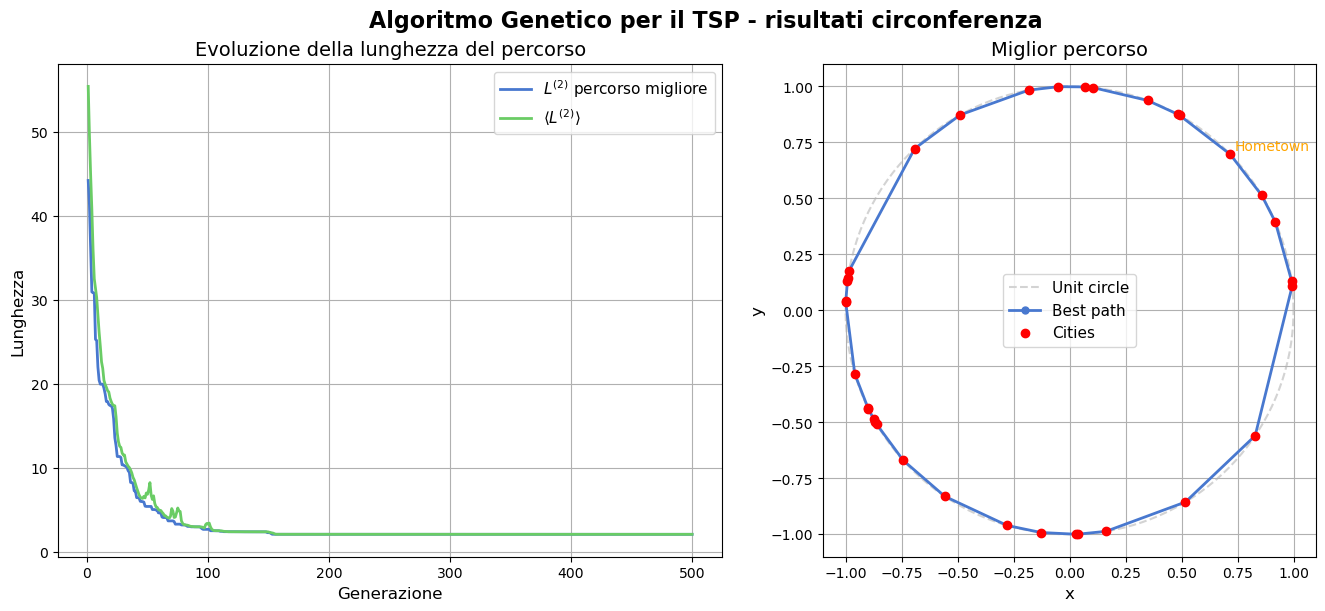

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Stile visivo
plt.style.use("seaborn-v0_8-muted")

gen = np.arange(500) + 1
L2, L2_mean = np.loadtxt("CIRCUMFERENCE/results.dat", usecols=(1,2), unpack=True)

x, y = np.loadtxt("CIRCUMFERENCE/cities.dat", usecols=(1,2), unpack=True)

path = np.loadtxt("CIRCUMFERENCE/best_path.dat", usecols=0, unpack=True).astype(int) - 1
x_path = np.append(x[path], x[path[0]])
y_path = np.append(y[path], y[path[0]])

fig, axes = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

axes[0].plot(gen, L2, label=r"$L^{(2)}$ percorso migliore", lw=2)
axes[0].plot(gen, L2_mean, label=r"$\langle L^{(2)} \rangle$", lw=2)
axes[0].set_xlabel("Generazione", fontsize=12)
axes[0].set_ylabel("Lunghezza", fontsize=12)
axes[0].set_title("Evoluzione della lunghezza del percorso", fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True)

theta = np.linspace(0, 2 * np.pi, 300)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

axes[1].plot(x_circle, y_circle, linestyle='--', color='lightgray', label='Unit circle', zorder=0)
axes[1].plot(x_path, y_path, '-o', label='Best path', lw=2, markersize=5, zorder=2)
axes[1].scatter(x, y, c='red', label='Cities', zorder=3)
axes[1].text(x[path[0]] + 0.02, y[path[0]] + 0.02, "Hometown", color='orange', fontsize=10, zorder=5)
axes[1].set_title("Miglior percorso", fontsize=14)
axes[1].set_xlabel("x", fontsize=12)
axes[1].set_ylabel("y", fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

plt.suptitle("Algoritmo Genetico per il TSP - risultati circonferenza", fontsize=16, weight='bold')
plt.show()

Come si osserva, l'algoritmo ha risolto il problema correttamente trovando effettivamente il percorso più breve, in questo caso immediatamente riconoscibile. Sia la funzione costo che la lunghezza media decrescono abbastanza rapidamente e convergono dopo circa $200$ generazioni al valore ottimale, suggerendo che avrei potuto ridurre il numero di generazioni senza alterare il risultato finale.

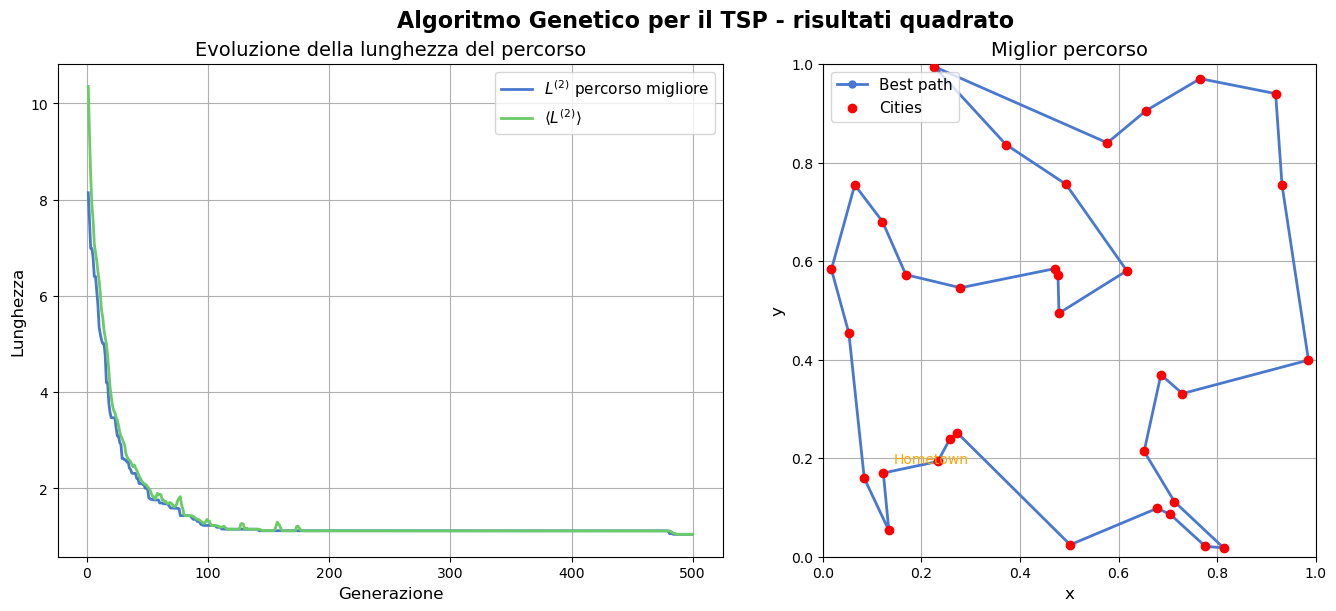

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Stile visivo
plt.style.use("seaborn-v0_8-muted")

gen = np.arange(500) + 1
L2, L2_mean = np.loadtxt("SQUARE/results.dat", usecols=(1,2), unpack=True)

x, y = np.loadtxt("SQUARE/cities.dat", usecols=(1,2), unpack=True)

path = np.loadtxt("SQUARE/best_path.dat", usecols=0, unpack=True).astype(int) - 1
x_path = np.append(x[path], x[path[0]])
y_path = np.append(y[path], y[path[0]])

fig, axes = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

axes[0].plot(gen, L2, label=r"$L^{(2)}$ percorso migliore", lw=2)
axes[0].plot(gen, L2_mean, label=r"$\langle L^{(2)} \rangle$", lw=2)
axes[0].set_xlabel("Generazione", fontsize=12)
axes[0].set_ylabel("Lunghezza", fontsize=12)
axes[0].set_title("Evoluzione della lunghezza del percorso", fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True)

axes[1].plot(x_path, y_path, '-o', label='Best path', lw=2, markersize=5, zorder=2)
axes[1].scatter(x, y, c='red', label='Cities', zorder=3)
axes[1].text(x[path[0]] + 0.02, y[path[0]] + 0.02, "Hometown", color='orange', fontsize=10, zorder=5)
axes[1].set_title("Miglior percorso", fontsize=14)
axes[1].set_xlabel("x", fontsize=12)
axes[1].set_ylabel("y", fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_aspect('equal', adjustable='box')

plt.suptitle("Algoritmo Genetico per il TSP - risultati quadrato", fontsize=16, weight='bold')
plt.show()

Il fatto che il percorso individuato non abbia incroci ci fa capire che si tratta di una buona soluzione. Tuttavia, in questo caso, non possiamo essere certi che corrisponda effettivamente al percorso più breve. Il problema, infatti, presenta diversi minimi locali in cui l'algoritmo può rimanere intrappolato. Il ruolo delle mutazioni è proprio quello di aggiungere diversità, evitando la convergenza rapida verso uno di questi minimi. Facendo diverse prove, inoltre, ho notato che il successo dell'algoritmo dipende fortemente dai valori dei vari parametri.